**The cell below imports all necessary extensions**

In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import re
from ast import literal_eval

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

**The cell below reads in movies_metadata.csv**

In [2]:
data_dir = '.'
data_dir = Path('the-movies-dataset')
raw_data = pd.read_csv('/Users/anoglows/Documents/movieProject/the-movies-dataset/movies_metadata.csv')
credits = pd.read_csv('/Users/anoglows/Documents/movieProject/the-movies-dataset/credits.csv')



/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
raw_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Create working dataframe from raw data ###
I am going to create a new dataframe called good_data. This df will include all necessary columns from the raw_data dataframe in addition to vectorized data for genres. I will also remove any movies that have missing values from its data.

In [5]:
raw_data = raw_data.loc[(raw_data['imdb_id'] != '0')]
good_data = raw_data.loc[:, ['id', 'imdb_id','title', 'popularity', 'release_date', 'revenue', 'budget', 'runtime', 'vote_average', 'vote_count']]
good_data['year'] = raw_data["release_date"].str.slice(0,4).astype(float)
good_data['month'] = raw_data["release_date"].str.slice(5,7).astype(float)
good_data['collection'] = raw_data['belongs_to_collection'].notnull().astype(int)
good_data['id'] = good_data['id'].astype(int)
good_data['budget'] = good_data['budget'].astype(float)
good_data = good_data.loc[:, ['id', 'imdb_id', 'title', 'popularity', 'release_date', 'year', 'month', 'revenue', 'budget', 'runtime', 'vote_average', 'vote_count']]


**The cells below create our vectorized data**

In [6]:
genres_raw = (raw_data['genres']
        .str.replace('[','')
        .str.replace(']','')
        .str.replace('{','')
        .str.replace('}','')
        .str.replace("'id':" ,'')
        .str.replace("'name':" ,'')
        .str.replace('0','') 
        .str.replace('1','') 
        .str.replace('2','') 
        .str.replace('3','') 
        .str.replace('4','') 
        .str.replace('5','') 
        .str.replace('6','') 
        .str.replace('7','') 
        .str.replace('8','') 
        .str.replace('9','') 
        .str.replace(' ','') 
        .str.replace("'", '')
        .str.lower()
        .str.split(",")
)           
bad_genres = ['sciencefiction',
              'foreign',
              'tvmovie', 
              'carouselproductions', 
              'visionviewentertainment',
              'telescenefilmgroupproductions',
              'aniplex',
              'gohands',
              'brostatv',
              'mardockscrambleproductioncommittee',
              'sentaifilmworks',
              'odysseymedia',
              'pulserproductions',
              'roguestate',
              'thecartel'
             ]

genres = []
for i in genres_raw:
    for j in i:
        if j not in genres and j and j not in bad_genres:
            genres.append(j)


In [7]:
def add_genre(source, dest, genre):
    dest[genre] = source['genres'].str.contains(genre, case = False)
    dest[genre] = dest[genre].astype(int)
for genre in genres:
    add_genre(raw_data, good_data, genre)
#vector_data.head(5)

In [8]:
credits['crew'] = credits['crew'].apply(literal_eval)
credits['cast'] = credits['cast'].apply(literal_eval)


In [9]:
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [10]:
credits['cast'] = credits['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
credits['cast'] = credits['cast'].apply(lambda x: x[:5] if len(x) >=5 else x)
credits['director'] = credits['crew'].apply(director)

In [11]:
good_data = good_data.merge(credits.loc[:,['id','director', 'cast']], on="id")

In [12]:
good_data.head(5)

,id,imdb_id,title,popularity,release_date,year,month,revenue,budget,runtime,...,thriller,horror,history,mystery,war,music,documentary,western,director,cast
0,862,tt0114709,Toy Story,21.9469,1995-10-30,1995.0,10.0,373554033.0,30000000.0,81.0,...,0,0,0,0,0,0,0,0,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,8844,tt0113497,Jumanji,17.0155,1995-12-15,1995.0,12.0,262797249.0,65000000.0,104.0,...,0,0,0,0,0,0,0,0,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,15602,tt0113228,Grumpier Old Men,11.7129,1995-12-22,1995.0,12.0,0.0,0.0,101.0,...,0,0,0,0,0,0,0,0,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,31357,tt0114885,Waiting to Exhale,3.85949,1995-12-22,1995.0,12.0,81452156.0,16000000.0,127.0,...,0,0,0,0,0,0,0,0,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,11862,tt0113041,Father of the Bride Part II,8.38752,1995-02-10,1995.0,2.0,76578911.0,0.0,106.0,...,0,0,0,0,0,0,0,0,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short, Kim..."


In [13]:
def budgetStats(df):
    noBudget = df.loc[df['budget'] == 0,'budget'].count()
    numMovies = df.count().max()
    ratio = noBudget / numMovies
    return noBudget, numMovies, ratio, 1 - ratio

In [14]:
def revenueStats(df):
    noRevenue = df.loc[df['revenue'] == 0,'revenue'].count()
    numMovies = df.count().max()
    ratio = noRevenue / numMovies
    return noRevenue, numMovies, ratio, 1 - ratio

In [15]:
def noRevOrBudg(df):
    neither = df.loc[(df['budget'] == 0) & (df['revenue'] == 0) ,'budget'].count()
    numMovies = df.count().max()
    ratio = neither / numMovies
    return neither, numMovies, ratio, 1 - ratio

In [16]:
display(budgetStats(good_data))
display(revenueStats(good_data))
display(noRevOrBudg(good_data))

(36626, 45538, 0.8042953138038561, 0.1957046861961439)

(38107, 45538, 0.83681760288111029, 0.16318239711888971)

(34588, 45538, 0.759541481839343, 0.240458518160657)

In [17]:
vote_counts = raw_data[raw_data['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = raw_data[raw_data['vote_average'].notnull()]['vote_average'].astype('int')

In [18]:
m = vote_counts.quantile(0.95)

def weighted_rating(x):
    C = vote_averages.mean()
    v = x['vote_count']
    R = x['vote_average']
    return (v*R/(v+m)) + (m*C/(m+v))

In [19]:
def ranking(source = good_data, genre = None, count = 25, columns = None):
    if genre:
        dest = source[(source['vote_count'] >= m) & (source['vote_count'].notnull()) & (source['vote_average'].notnull()) & (source[genre] == 1)]
    else:
        dest = source[(source['vote_count'] >= m) & (source['vote_count'].notnull()) & (source['vote_average'].notnull())]
    if columns == 'all':
        dest = dest
    elif not columns:
        dest = dest[['title','director','cast', 'year', 'vote_count', 'vote_average', 'popularity']]
    else:
        dest = dest[columns]
    dest['vote_average'] = dest['vote_average'].astype('int')
    dest['vote_count'] = dest['vote_count'].astype('int')
    dest['weighted_rating'] = dest.apply(weighted_rating, axis=1)
    dest = dest.sort_values('weighted_rating', ascending=False).reset_index(drop = True)
    dest.insert(0, 'rank', dest.index + 1)
    return(dest.head(count))




In [20]:
top25 = dict()
for genre in genres:
    top25[genre] = ranking(genre=genre, columns = 'all')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [21]:
#for genre in genres:
#    display(genre)
#    display(top25[genre].head())

In [22]:
top1000 = ranking(count = 1000, columns ='all')
    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [23]:
top1000.head(5)

,rank,id,imdb_id,title,popularity,release_date,year,month,revenue,budget,...,horror,history,mystery,war,music,documentary,western,director,cast,weighted_rating
0,1,27205,tt1375666,Inception,29.1081,2010-07-14,2010.0,7.0,8.255328e+08,160000000.0,...,0,0,1,0,0,0,0,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...",7.917588
1,2,155,tt0468569,The Dark Knight,123.167,2008-07-16,2008.0,7.0,1.004558e+09,185000000.0,...,0,0,0,0,0,0,0,Christopher Nolan,"[Christian Bale, Michael Caine, Heath Ledger, ...",7.905871
2,3,157336,tt0816692,Interstellar,32.2135,2014-11-05,2014.0,11.0,6.751200e+08,165000000.0,...,0,0,0,0,0,0,0,Christopher Nolan,"[Matthew McConaughey, Jessica Chastain, Anne H...",7.897107
3,4,550,tt0137523,Fight Club,63.8696,1999-10-15,1999.0,10.0,1.008538e+08,63000000.0,...,0,0,0,0,0,0,0,David Fincher,"[Edward Norton, Brad Pitt, Meat Loaf, Jared Le...",7.881753
4,5,120,tt0120737,The Lord of the Rings: The Fellowship of the Ring,32.0707,2001-12-18,2001.0,12.0,8.713684e+08,93000000.0,...,0,0,0,0,0,0,0,Peter Jackson,"[Elijah Wood, Ian McKellen, Cate Blanchett, Or...",7.871787


In [24]:
display(budgetStats(top1000))
display(revenueStats(top1000))
display(noRevOrBudg(top1000))

(59, 1000, 0.058999999999999997, 0.94100000000000006)

(50, 1000, 0.050000000000000003, 0.94999999999999996)

(25, 1000, 0.025000000000000001, 0.97499999999999998)

In [25]:
topMonths = top1000.groupby('month').count()['rank']

In [26]:
topYears = top1000.groupby('year').count()['rank']

Text(0.5,1,'Counts of number of movies released per month of the top 1000 movies in the dataset')

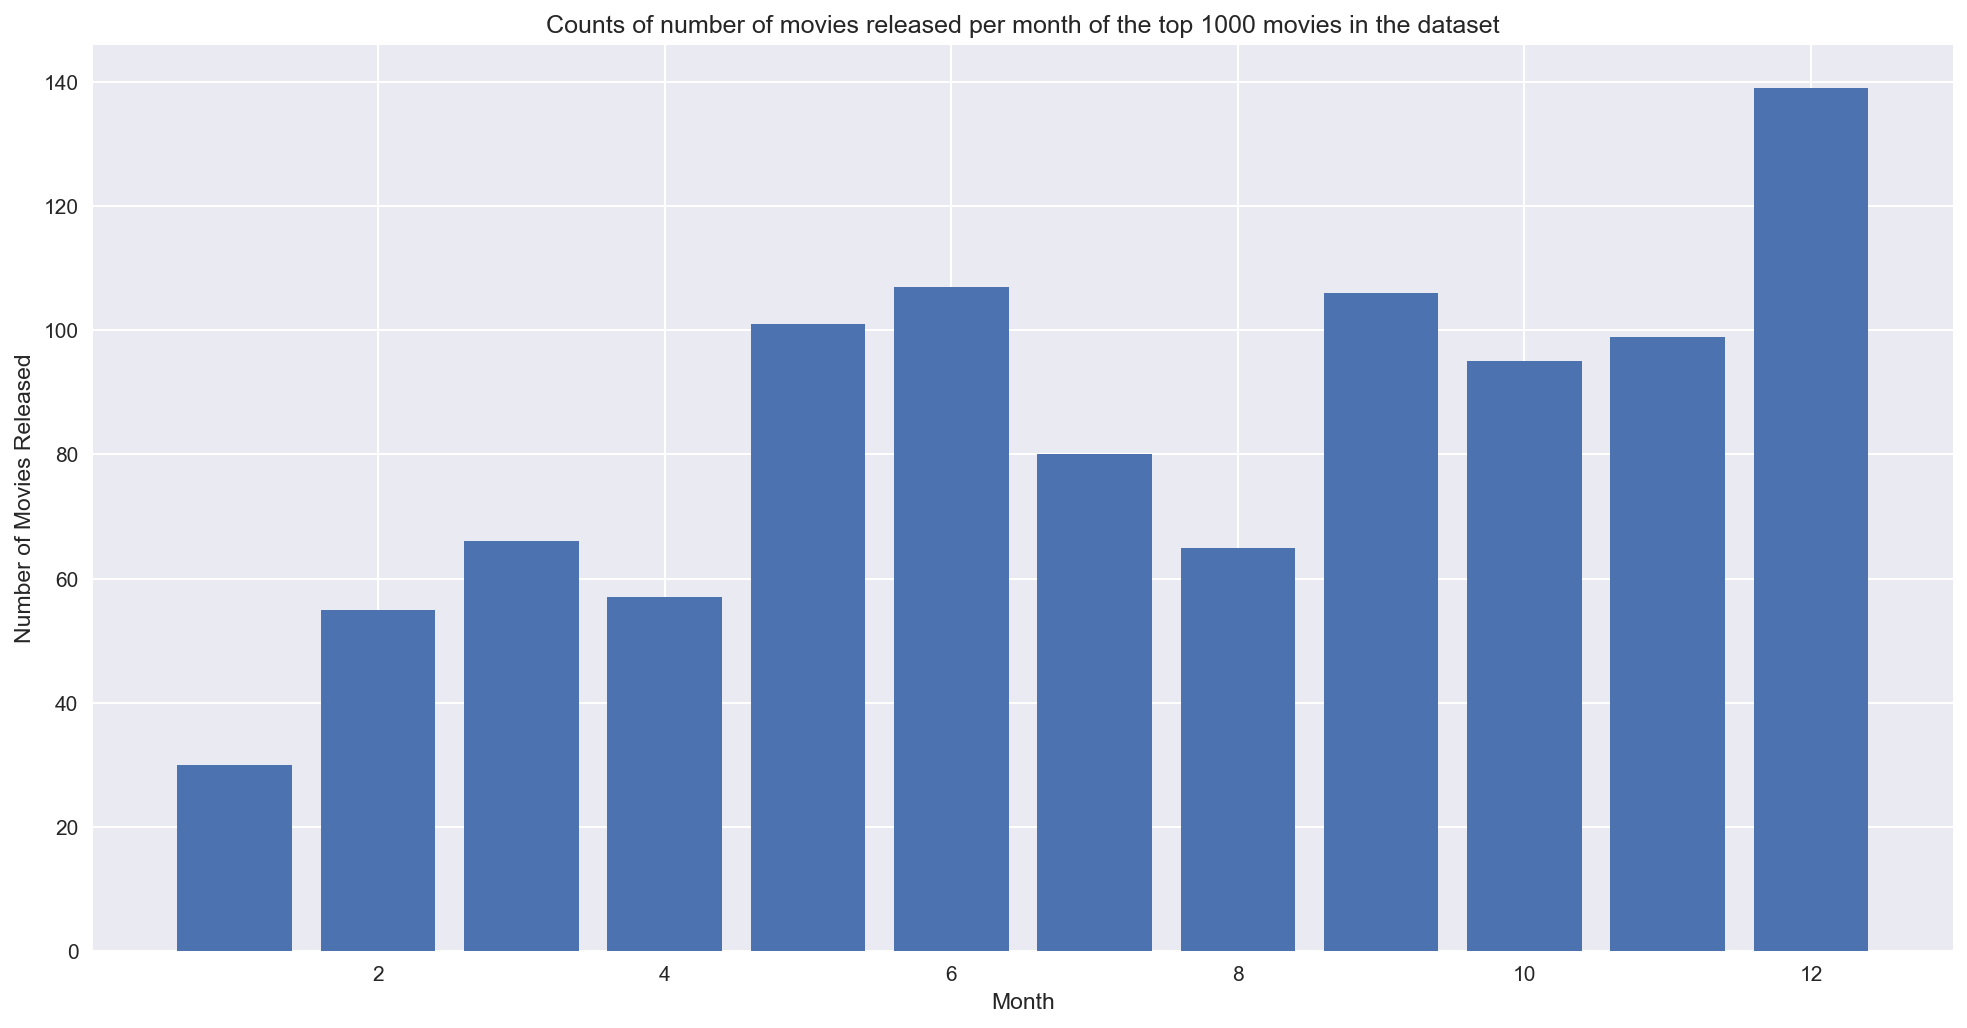

In [27]:
plt.figure()
plt.bar(topMonths.index, topMonths)
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.title('Counts of number of movies released per month of the top 1000 movies in the dataset')

From this graph we can see that the most popular movies were released in December. Often times, blockbuster movies have a christmas release that fuels the box office and is before awards season. Also, we can see a spike in the amount of popular movies during May and June compared to the other summer months. Its interesting to see that January has the least amount of movies in the top 1000. This makes sense because I can't think of any movies that I have seen released in January.

Text(0.5,1,'Counts of number of movies released per year of the top 1000 movies in the dataset')

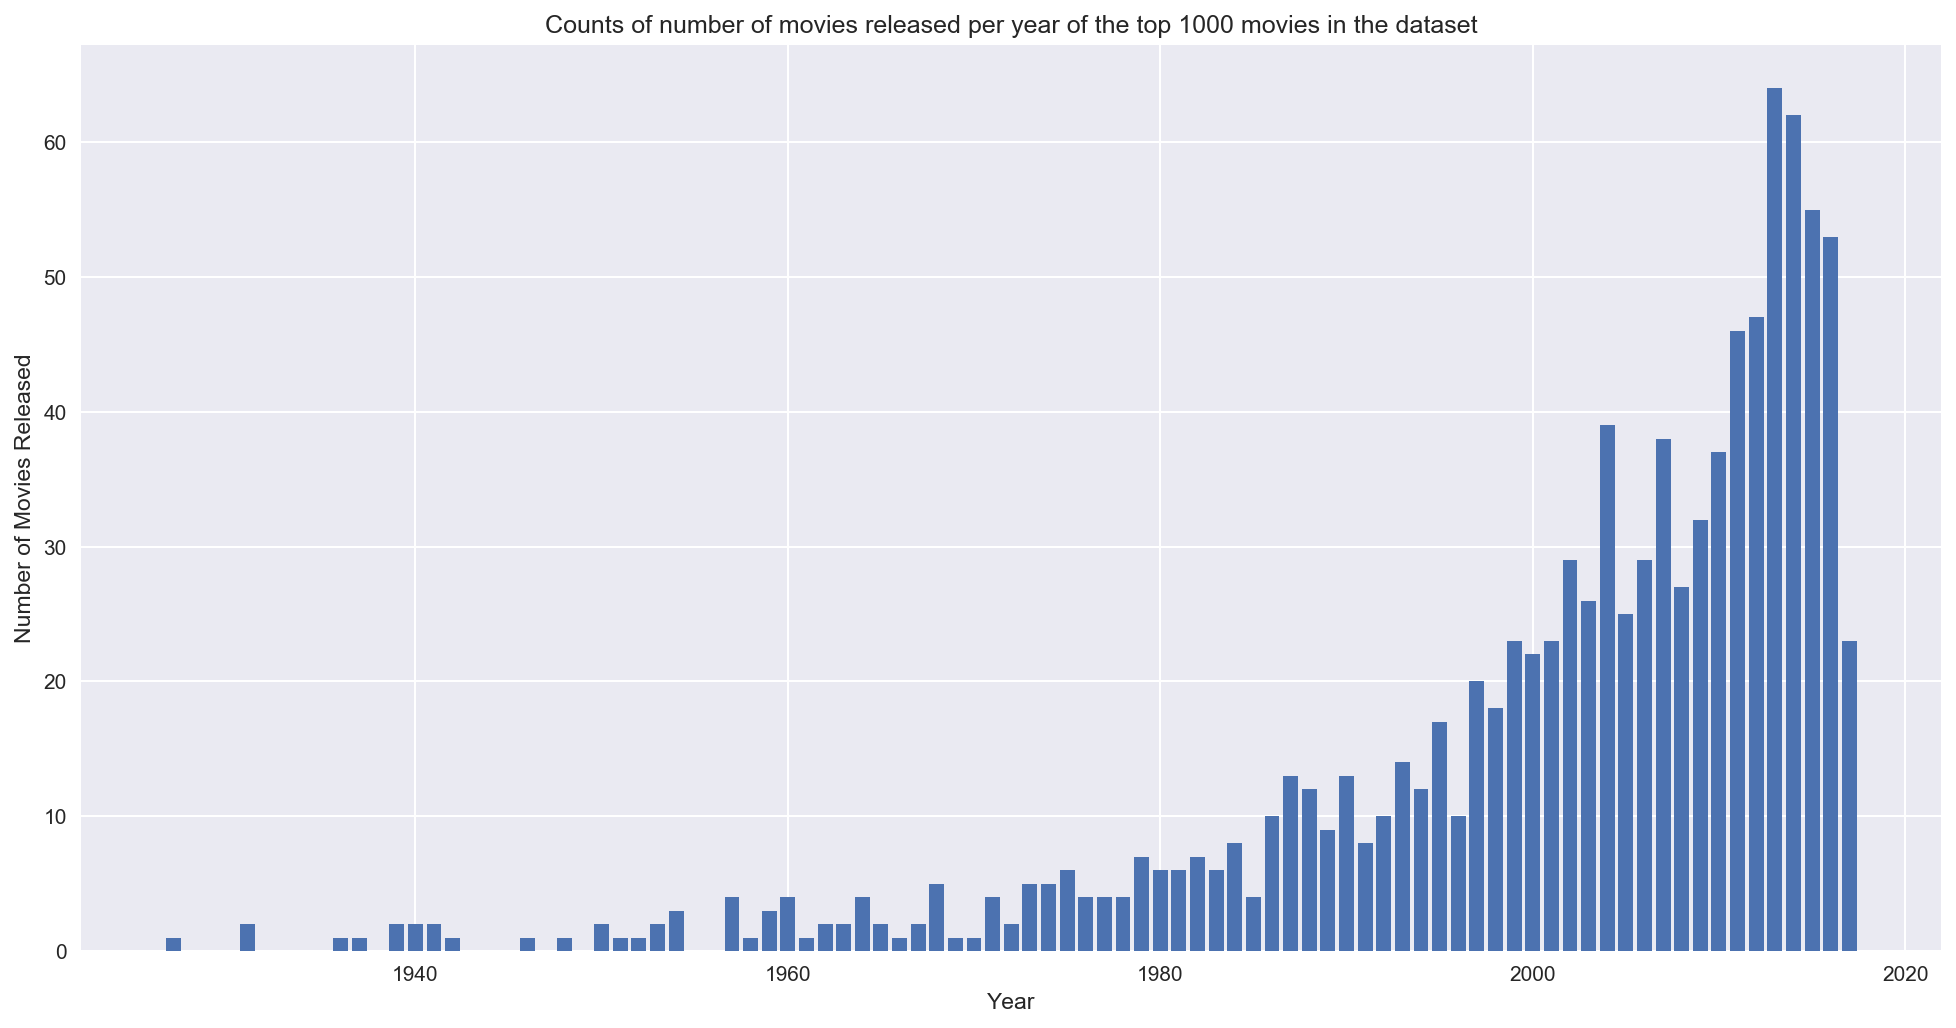

In [28]:
plt.figure()
plt.bar(topYears.index, topYears)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Counts of number of movies released per year of the top 1000 movies in the dataset')

From this graph, we can see that the most popular movies in our dataset came out after the year 2000, in particular the 2010s. This is because this people who would have contributed reviews were more familiar with these movies. Despite this, there are still classic movies included in our dataset that have withstood the test of time.

With the results from this second graph, I am going to investigat into movie that were released before 1980. I want to see what features of these movies they have in common with each other.

In [29]:
pre1980 = top1000.loc[top1000['year'] < 1980,:]

In [30]:
len(pre1980)

97

Of the top 1000 movies in our dataset, only 97 were released prior to 1980.

In [31]:
top250pre1980 = pre1980.loc[pre1980['rank']<250,:]
len(top250pre1980)

25

A common list on IMDB is their top250 chart. This lists the top 250 movies in their dataset. Only 25 movies in my top250 are from before 1980.

In [32]:
def movies_by_director(director):
    return top1000.loc[top1000['director'] == director, :]

In [33]:
movies_by_director('Steven Spielberg').head(1)

,rank,id,imdb_id,title,popularity,release_date,year,month,revenue,budget,...,horror,history,mystery,war,music,documentary,western,director,cast,weighted_rating
21,22,424,tt0108052,Schindler's List,41.7251,1993-11-29,1993.0,11.0,321365567.0,22000000.0,...,0,1,0,1,0,0,0,Steven Spielberg,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...",7.754473


In [34]:
def most_popular_directors():
    filtered = top1000.groupby('director').filter(lambda x: x['title'].count() > 2)
    filtered = filtered.groupby('director').agg({'weighted_rating':'mean', 'title': 'count'}).sort_values(by='weighted_rating', ascending=False)
    return filtered.rename(index = str, columns={'title': 'count'})

In [38]:
most_popular_directors().head(25)

In [39]:
animated_movies = ranking(genre='animation',count = 1000, columns='all')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [54]:
#animated_movies.groupby('director').agg({'runtime':'mean', 'title':'count'}).sort_values('title', ascending=False).head(10)

,runtime,title
director,,
Hayao Miyazaki,112.800000,10
Ron Clements,94.166667,6
John Lasseter,98.200000,5
Eric Darnell,87.500000,4
Robert Zemeckis,103.750000,4
Hamilton Luske,79.500000,4
Carlos Saldanha,95.750000,4
Wolfgang Reitherman,79.500000,4
Andrew Stanton,98.333333,3


In [55]:
animated_movies.columns

Index(['rank', 'id', 'imdb_id', 'title', 'popularity', 'release_date', 'year',
       'month', 'revenue', 'budget', 'runtime', 'vote_average', 'vote_count',
       'animation', 'comedy', 'family', 'adventure', 'fantasy', 'romance',
       'drama', 'action', 'crime', 'thriller', 'horror', 'history', 'mystery',
       'war', 'music', 'documentary', 'western', 'director', 'cast',
       'weighted_rating'],
      dtype='object')

In [60]:
credits.iloc[0,:]

cast        [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
crew        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
id                                                        862
director                                        John Lasseter
Name: 0, dtype: object